
# Neural network 
<br/>
修正時間: 2020/06/27 (補上最後結果)


## 模型介紹


<img src = 'https://cdn-images-1.medium.com/proxy/1*RGV6Bb3ChmVWsA8Q6Qth6Q.png' > 
<br/>
NN是透過機器學習去調整不同layers間各個nodes間的權重(weights)，以去進行training <br/>
需要設置的部分是input為哪些要素、model的學習率及每次training的參數等等，在調整的過程中先讓model呈現overfitting的狀況，以確保model是可以被訓練得，接下來再修正overfitting的影響，去檢視testing的Accuracy及loss的變化，以檢測model是否可以實際去預測output應呈現的結果。

## 程式碼

安裝所需套件 <br/>
使用keras套件建構neural network model

In [1]:
from keras.models import Sequential, load_model 
from keras.layers.core import Dense, Dropout, Flatten, Activation 
from sklearn import preprocessing
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Using TensorFlow backend.


### 資料輸入

開啟檔案 <br/>
將兩筆檔案的columns' names修正為相同的columns' names

附註:
1. 需要把csv跟ipynb放到同一資料夾
2. 注意受試者是同一組

In [2]:
with open('013_b_1114_1_2_p1.csv', newline='') as csvfile1:
    data1 = pd.read_csv(csvfile1)
    data1 = data1.rename(columns = {'p1Cash':'Cash','p1Stock':'Stock','p1TotalAsset':'TotalAsset',
                                   'p1Decision':'Decision','p1ChechHistory':'CheckHistory'})
with open('014_b_1114_1_2_p2.csv', newline='') as csvfile2:
    data2 = pd.read_csv(csvfile2)
    data2 = data2.rename(columns = {'p2Cash':'Cash','p2Stock':'Stock','p2TotalAsset':'TotalAsset',
                                   'p2Decision':'Decision','p2ChechHistory':'CheckHistory'})

從第13位(data1)選取做為X的資料(用於預測) <br/>
Cash為參與者持有的現金<br/>
StockPrice為當回合的股票價格<br/>
TotalAsset為參與者之總資產<br/>
opp_TotalAsset為對手之總資產<br/>
CheckHistory紀錄參與者是否觀看歷史紀錄<br/>

In [3]:
X = data1.loc[:,['Cash','StockPrice','TotalAsset']]
X['opp_TotalAsset'] = data2.loc[:,['TotalAsset']]
X['CheckHistory'] = pd.get_dummies(data1.loc[:,'CheckHistory'])['yes']

將前一回合中所有的X變項加到下一回合，一起當作用於預測的變項

In [4]:
X_1_101 = X[1:101]
X_1_101 = X_1_101.reset_index()
X_0_100 = X[0:100]
X_0_100 = X_0_100.rename(columns = {'Cash':'pre_Cash','StockPrice':'pre_StockPrice','TotalAsset':'pre_TotalAsset',
                                   'opp_TotalAsset':'pre_opp_TotalAsset','CheckHistory':'pre_CheckHistory'}, inplace = False)
X = pd.concat([X_1_101,X_0_100], axis=1)
X = X.drop(['index'], axis = 1)

將delta_Price輸入成為變項，並將X中所有的資料標準化。

In [5]:
X['delta_Price'] = X['StockPrice']-X['pre_StockPrice']
X_data = X[0:99]
X = preprocessing.scale(X_data)

輸入第13位(data1)的Decision作為Y變項 <br/>
並以one-hot enncoding的方式設置Y做為被預測的變項。

In [6]:
Y_data = data1.loc[:,'Decision']
Y_dum = pd.get_dummies(Y_data)
Y = Y_dum[1:100]

### 建立model，並以圖表表示成果

建立model，input有11個，hidden layer設80個，output3個。<br/>


In [7]:
#固定每次random跑出的結果以利解釋
np.random.seed(408)
#建構 model
model = Sequential()
model.add(Dense(80, input_dim = 11, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()
# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
# fit the keras model, epochs = 1000, batch_size = 80
#資料分配:79個training data, 20個testing data
test = model.fit(X,Y, epochs = 1000, batch_size = 80, validation_split = 0.2, shuffle = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                960       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 243       
Total params: 1,203
Trainable params: 1,203
Non-trainable params: 0
_________________________________________________________________
Train on 79 samples, validate on 20 samples
Epoch 1/1000
79/79 [==============================] - 1s 15ms/step - loss: 1.1265 - accuracy: 0.3291 - val_loss: 1.1081 - val_accuracy: 0.3000
Epoch 2/1000
79/79 [==============================] - 0s 38us/step - loss: 1.1173 - accuracy: 0.3671 - val_loss: 1.1049 - val_accuracy: 0.3000
Epoch 3/1000
79/79 [==============================] - 0s 38us/step - loss: 1.1083 - accuracy: 0.3797 - val_loss: 1.1017 - val_accuracy: 0.3000
Epoch 4/1000
79/79 [=====================

Epoch 54/1000
79/79 [==============================] - 0s 25us/step - loss: 0.7985 - accuracy: 0.7722 - val_loss: 0.9572 - val_accuracy: 0.3500
Epoch 55/1000
79/79 [==============================] - 0s 34us/step - loss: 0.7931 - accuracy: 0.7595 - val_loss: 0.9549 - val_accuracy: 0.3500
Epoch 56/1000
79/79 [==============================] - 0s 26us/step - loss: 0.7877 - accuracy: 0.7595 - val_loss: 0.9527 - val_accuracy: 0.4000
Epoch 57/1000
79/79 [==============================] - 0s 50us/step - loss: 0.7822 - accuracy: 0.7595 - val_loss: 0.9505 - val_accuracy: 0.4000
Epoch 58/1000
79/79 [==============================] - 0s 38us/step - loss: 0.7768 - accuracy: 0.7595 - val_loss: 0.9483 - val_accuracy: 0.4000
Epoch 59/1000
79/79 [==============================] - 0s 29us/step - loss: 0.7713 - accuracy: 0.7595 - val_loss: 0.9462 - val_accuracy: 0.4000
Epoch 60/1000
79/79 [==============================] - 0s 22us/step - loss: 0.7658 - accuracy: 0.7595 - val_loss: 0.9440 - val_accuracy:

Epoch 111/1000
79/79 [==============================] - 0s 75us/step - loss: 0.5060 - accuracy: 0.8481 - val_loss: 0.8791 - val_accuracy: 0.5000
Epoch 112/1000
79/79 [==============================] - 0s 82us/step - loss: 0.5023 - accuracy: 0.8481 - val_loss: 0.8786 - val_accuracy: 0.5000
Epoch 113/1000
79/79 [==============================] - 0s 63us/step - loss: 0.4986 - accuracy: 0.8481 - val_loss: 0.8781 - val_accuracy: 0.5500
Epoch 114/1000
79/79 [==============================] - 0s 76us/step - loss: 0.4950 - accuracy: 0.8481 - val_loss: 0.8776 - val_accuracy: 0.5500
Epoch 115/1000
79/79 [==============================] - 0s 67us/step - loss: 0.4915 - accuracy: 0.8481 - val_loss: 0.8771 - val_accuracy: 0.5500
Epoch 116/1000
79/79 [==============================] - 0s 75us/step - loss: 0.4881 - accuracy: 0.8481 - val_loss: 0.8767 - val_accuracy: 0.5500
Epoch 117/1000
79/79 [==============================] - 0s 63us/step - loss: 0.4847 - accuracy: 0.8481 - val_loss: 0.8764 - val_ac

Epoch 168/1000
79/79 [==============================] - 0s 62us/step - loss: 0.3797 - accuracy: 0.8734 - val_loss: 0.8793 - val_accuracy: 0.5500
Epoch 169/1000
79/79 [==============================] - 0s 63us/step - loss: 0.3785 - accuracy: 0.8861 - val_loss: 0.8799 - val_accuracy: 0.5500
Epoch 170/1000
79/79 [==============================] - 0s 58us/step - loss: 0.3773 - accuracy: 0.8861 - val_loss: 0.8805 - val_accuracy: 0.5500
Epoch 171/1000
79/79 [==============================] - 0s 97us/step - loss: 0.3761 - accuracy: 0.8861 - val_loss: 0.8811 - val_accuracy: 0.5500
Epoch 172/1000
79/79 [==============================] - 0s 72us/step - loss: 0.3749 - accuracy: 0.8987 - val_loss: 0.8817 - val_accuracy: 0.5500
Epoch 173/1000
79/79 [==============================] - 0s 88us/step - loss: 0.3738 - accuracy: 0.8987 - val_loss: 0.8823 - val_accuracy: 0.5500
Epoch 174/1000
79/79 [==============================] - 0s 76us/step - loss: 0.3727 - accuracy: 0.8987 - val_loss: 0.8830 - val_ac

Epoch 225/1000
79/79 [==============================] - 0s 51us/step - loss: 0.3269 - accuracy: 0.8987 - val_loss: 0.9362 - val_accuracy: 0.5500
Epoch 226/1000
79/79 [==============================] - 0s 37us/step - loss: 0.3261 - accuracy: 0.8987 - val_loss: 0.9376 - val_accuracy: 0.5500
Epoch 227/1000
79/79 [==============================] - 0s 51us/step - loss: 0.3254 - accuracy: 0.8987 - val_loss: 0.9391 - val_accuracy: 0.5500
Epoch 228/1000
79/79 [==============================] - 0s 75us/step - loss: 0.3246 - accuracy: 0.8987 - val_loss: 0.9406 - val_accuracy: 0.5500
Epoch 229/1000
79/79 [==============================] - 0s 38us/step - loss: 0.3239 - accuracy: 0.8987 - val_loss: 0.9421 - val_accuracy: 0.5500
Epoch 230/1000
79/79 [==============================] - 0s 55us/step - loss: 0.3232 - accuracy: 0.8987 - val_loss: 0.9436 - val_accuracy: 0.5500
Epoch 231/1000
79/79 [==============================] - 0s 51us/step - loss: 0.3224 - accuracy: 0.8987 - val_loss: 0.9451 - val_ac

Epoch 282/1000
79/79 [==============================] - 0s 39us/step - loss: 0.2905 - accuracy: 0.9114 - val_loss: 1.0529 - val_accuracy: 0.5500
Epoch 283/1000
79/79 [==============================] - 0s 38us/step - loss: 0.2899 - accuracy: 0.9114 - val_loss: 1.0556 - val_accuracy: 0.5500
Epoch 284/1000
79/79 [==============================] - 0s 63us/step - loss: 0.2894 - accuracy: 0.9114 - val_loss: 1.0583 - val_accuracy: 0.5500
Epoch 285/1000
79/79 [==============================] - 0s 38us/step - loss: 0.2888 - accuracy: 0.9114 - val_loss: 1.0611 - val_accuracy: 0.5500
Epoch 286/1000
79/79 [==============================] - 0s 38us/step - loss: 0.2883 - accuracy: 0.9114 - val_loss: 1.0639 - val_accuracy: 0.5500
Epoch 287/1000
79/79 [==============================] - 0s 51us/step - loss: 0.2877 - accuracy: 0.9114 - val_loss: 1.0666 - val_accuracy: 0.5500
Epoch 288/1000
79/79 [==============================] - 0s 37us/step - loss: 0.2872 - accuracy: 0.9114 - val_loss: 1.0694 - val_ac

Epoch 339/1000
79/79 [==============================] - 0s 54us/step - loss: 0.2609 - accuracy: 0.9114 - val_loss: 1.2379 - val_accuracy: 0.5500
Epoch 340/1000
79/79 [==============================] - 0s 50us/step - loss: 0.2604 - accuracy: 0.9114 - val_loss: 1.2415 - val_accuracy: 0.5500
Epoch 341/1000
79/79 [==============================] - 0s 50us/step - loss: 0.2599 - accuracy: 0.9114 - val_loss: 1.2451 - val_accuracy: 0.5500
Epoch 342/1000
79/79 [==============================] - 0s 50us/step - loss: 0.2594 - accuracy: 0.9114 - val_loss: 1.2488 - val_accuracy: 0.5500
Epoch 343/1000
79/79 [==============================] - 0s 35us/step - loss: 0.2589 - accuracy: 0.9114 - val_loss: 1.2524 - val_accuracy: 0.5500
Epoch 344/1000
79/79 [==============================] - 0s 63us/step - loss: 0.2584 - accuracy: 0.9114 - val_loss: 1.2560 - val_accuracy: 0.5500
Epoch 345/1000
79/79 [==============================] - 0s 51us/step - loss: 0.2579 - accuracy: 0.9114 - val_loss: 1.2597 - val_ac

Epoch 396/1000
79/79 [==============================] - 0s 51us/step - loss: 0.2347 - accuracy: 0.9241 - val_loss: 1.4588 - val_accuracy: 0.5500
Epoch 397/1000
79/79 [==============================] - 0s 35us/step - loss: 0.2343 - accuracy: 0.9241 - val_loss: 1.4629 - val_accuracy: 0.5500
Epoch 398/1000
79/79 [==============================] - 0s 51us/step - loss: 0.2339 - accuracy: 0.9241 - val_loss: 1.4669 - val_accuracy: 0.5500
Epoch 399/1000
79/79 [==============================] - 0s 25us/step - loss: 0.2334 - accuracy: 0.9241 - val_loss: 1.4710 - val_accuracy: 0.5500
Epoch 400/1000
79/79 [==============================] - 0s 38us/step - loss: 0.2330 - accuracy: 0.9241 - val_loss: 1.4751 - val_accuracy: 0.5500
Epoch 401/1000
79/79 [==============================] - 0s 37us/step - loss: 0.2326 - accuracy: 0.9241 - val_loss: 1.4791 - val_accuracy: 0.5500
Epoch 402/1000
79/79 [==============================] - 0s 25us/step - loss: 0.2322 - accuracy: 0.9241 - val_loss: 1.4831 - val_ac

Epoch 453/1000
79/79 [==============================] - 0s 50us/step - loss: 0.2115 - accuracy: 0.9241 - val_loss: 1.6866 - val_accuracy: 0.5500
Epoch 454/1000
79/79 [==============================] - 0s 29us/step - loss: 0.2111 - accuracy: 0.9241 - val_loss: 1.6906 - val_accuracy: 0.5500
Epoch 455/1000
79/79 [==============================] - 0s 38us/step - loss: 0.2107 - accuracy: 0.9241 - val_loss: 1.6946 - val_accuracy: 0.5500
Epoch 456/1000
79/79 [==============================] - 0s 38us/step - loss: 0.2103 - accuracy: 0.9241 - val_loss: 1.6986 - val_accuracy: 0.5500
Epoch 457/1000
79/79 [==============================] - 0s 41us/step - loss: 0.2099 - accuracy: 0.9241 - val_loss: 1.7025 - val_accuracy: 0.5500
Epoch 458/1000
79/79 [==============================] - 0s 38us/step - loss: 0.2095 - accuracy: 0.9241 - val_loss: 1.7064 - val_accuracy: 0.5500
Epoch 459/1000
79/79 [==============================] - 0s 38us/step - loss: 0.2091 - accuracy: 0.9241 - val_loss: 1.7102 - val_ac

Epoch 510/1000
79/79 [==============================] - 0s 41us/step - loss: 0.1899 - accuracy: 0.9241 - val_loss: 1.9099 - val_accuracy: 0.5500
Epoch 511/1000
79/79 [==============================] - 0s 32us/step - loss: 0.1895 - accuracy: 0.9241 - val_loss: 1.9139 - val_accuracy: 0.5500
Epoch 512/1000
79/79 [==============================] - 0s 43us/step - loss: 0.1891 - accuracy: 0.9241 - val_loss: 1.9180 - val_accuracy: 0.5500
Epoch 513/1000
79/79 [==============================] - 0s 25us/step - loss: 0.1887 - accuracy: 0.9241 - val_loss: 1.9220 - val_accuracy: 0.5500
Epoch 514/1000
79/79 [==============================] - 0s 25us/step - loss: 0.1884 - accuracy: 0.9241 - val_loss: 1.9260 - val_accuracy: 0.5500
Epoch 515/1000
79/79 [==============================] - 0s 37us/step - loss: 0.1880 - accuracy: 0.9241 - val_loss: 1.9300 - val_accuracy: 0.5500
Epoch 516/1000
79/79 [==============================] - 0s 44us/step - loss: 0.1877 - accuracy: 0.9241 - val_loss: 1.9340 - val_ac

Epoch 567/1000
79/79 [==============================] - 0s 51us/step - loss: 0.1699 - accuracy: 0.9241 - val_loss: 2.1376 - val_accuracy: 0.5500
Epoch 568/1000
79/79 [==============================] - 0s 32us/step - loss: 0.1695 - accuracy: 0.9241 - val_loss: 2.1415 - val_accuracy: 0.5500
Epoch 569/1000
79/79 [==============================] - 0s 38us/step - loss: 0.1692 - accuracy: 0.9241 - val_loss: 2.1455 - val_accuracy: 0.5500
Epoch 570/1000
79/79 [==============================] - 0s 34us/step - loss: 0.1688 - accuracy: 0.9241 - val_loss: 2.1494 - val_accuracy: 0.6000
Epoch 571/1000
79/79 [==============================] - 0s 64us/step - loss: 0.1685 - accuracy: 0.9241 - val_loss: 2.1532 - val_accuracy: 0.6000
Epoch 572/1000
79/79 [==============================] - 0s 50us/step - loss: 0.1682 - accuracy: 0.9241 - val_loss: 2.1571 - val_accuracy: 0.6000
Epoch 573/1000
79/79 [==============================] - 0s 41us/step - loss: 0.1678 - accuracy: 0.9241 - val_loss: 2.1609 - val_ac

Epoch 624/1000
79/79 [==============================] - 0s 27us/step - loss: 0.1517 - accuracy: 0.9241 - val_loss: 2.3544 - val_accuracy: 0.6500
Epoch 625/1000
79/79 [==============================] - 0s 51us/step - loss: 0.1514 - accuracy: 0.9241 - val_loss: 2.3581 - val_accuracy: 0.6500
Epoch 626/1000
79/79 [==============================] - 0s 40us/step - loss: 0.1512 - accuracy: 0.9241 - val_loss: 2.3618 - val_accuracy: 0.6500
Epoch 627/1000
79/79 [==============================] - 0s 50us/step - loss: 0.1509 - accuracy: 0.9241 - val_loss: 2.3654 - val_accuracy: 0.6500
Epoch 628/1000
79/79 [==============================] - 0s 49us/step - loss: 0.1506 - accuracy: 0.9241 - val_loss: 2.3691 - val_accuracy: 0.6500
Epoch 629/1000
79/79 [==============================] - 0s 50us/step - loss: 0.1502 - accuracy: 0.9241 - val_loss: 2.3727 - val_accuracy: 0.6500
Epoch 630/1000
79/79 [==============================] - 0s 41us/step - loss: 0.1500 - accuracy: 0.9241 - val_loss: 2.3764 - val_ac

Epoch 681/1000
79/79 [==============================] - 0s 54us/step - loss: 0.1360 - accuracy: 0.9494 - val_loss: 2.5608 - val_accuracy: 0.7000
Epoch 682/1000
79/79 [==============================] - 0s 50us/step - loss: 0.1357 - accuracy: 0.9494 - val_loss: 2.5644 - val_accuracy: 0.7000
Epoch 683/1000
79/79 [==============================] - 0s 38us/step - loss: 0.1354 - accuracy: 0.9494 - val_loss: 2.5679 - val_accuracy: 0.7000
Epoch 684/1000
79/79 [==============================] - 0s 49us/step - loss: 0.1352 - accuracy: 0.9494 - val_loss: 2.5715 - val_accuracy: 0.7000
Epoch 685/1000
79/79 [==============================] - 0s 38us/step - loss: 0.1349 - accuracy: 0.9494 - val_loss: 2.5750 - val_accuracy: 0.7000
Epoch 686/1000
79/79 [==============================] - 0s 41us/step - loss: 0.1346 - accuracy: 0.9494 - val_loss: 2.5786 - val_accuracy: 0.7000
Epoch 687/1000
79/79 [==============================] - 0s 51us/step - loss: 0.1344 - accuracy: 0.9494 - val_loss: 2.5821 - val_ac

Epoch 738/1000
79/79 [==============================] - 0s 50us/step - loss: 0.1224 - accuracy: 0.9494 - val_loss: 2.6818 - val_accuracy: 0.6000
Epoch 739/1000
79/79 [==============================] - 0s 38us/step - loss: 0.1222 - accuracy: 0.9494 - val_loss: 2.6835 - val_accuracy: 0.6000
Epoch 740/1000
79/79 [==============================] - 0s 40us/step - loss: 0.1220 - accuracy: 0.9494 - val_loss: 2.6852 - val_accuracy: 0.6000
Epoch 741/1000
79/79 [==============================] - 0s 50us/step - loss: 0.1218 - accuracy: 0.9494 - val_loss: 2.6869 - val_accuracy: 0.6000
Epoch 742/1000
79/79 [==============================] - 0s 40us/step - loss: 0.1216 - accuracy: 0.9494 - val_loss: 2.6885 - val_accuracy: 0.6000
Epoch 743/1000
79/79 [==============================] - 0s 38us/step - loss: 0.1214 - accuracy: 0.9494 - val_loss: 2.6902 - val_accuracy: 0.6000
Epoch 744/1000
79/79 [==============================] - 0s 37us/step - loss: 0.1212 - accuracy: 0.9494 - val_loss: 2.6918 - val_ac

Epoch 795/1000
79/79 [==============================] - 0s 41us/step - loss: 0.1113 - accuracy: 0.9620 - val_loss: 2.7715 - val_accuracy: 0.5500
Epoch 796/1000
79/79 [==============================] - 0s 54us/step - loss: 0.1111 - accuracy: 0.9620 - val_loss: 2.7729 - val_accuracy: 0.5500
Epoch 797/1000
79/79 [==============================] - 0s 39us/step - loss: 0.1109 - accuracy: 0.9620 - val_loss: 2.7744 - val_accuracy: 0.5500
Epoch 798/1000
79/79 [==============================] - 0s 37us/step - loss: 0.1107 - accuracy: 0.9620 - val_loss: 2.7759 - val_accuracy: 0.5500
Epoch 799/1000
79/79 [==============================] - 0s 51us/step - loss: 0.1106 - accuracy: 0.9620 - val_loss: 2.7773 - val_accuracy: 0.5500
Epoch 800/1000
79/79 [==============================] - 0s 48us/step - loss: 0.1104 - accuracy: 0.9620 - val_loss: 2.7787 - val_accuracy: 0.5500
Epoch 801/1000
79/79 [==============================] - 0s 43us/step - loss: 0.1102 - accuracy: 0.9620 - val_loss: 2.7802 - val_ac

Epoch 852/1000
79/79 [==============================] - 0s 38us/step - loss: 0.1017 - accuracy: 0.9620 - val_loss: 2.8564 - val_accuracy: 0.5000
Epoch 853/1000
79/79 [==============================] - 0s 38us/step - loss: 0.1015 - accuracy: 0.9620 - val_loss: 2.8579 - val_accuracy: 0.5000
Epoch 854/1000
79/79 [==============================] - 0s 53us/step - loss: 0.1014 - accuracy: 0.9620 - val_loss: 2.8594 - val_accuracy: 0.5000
Epoch 855/1000
79/79 [==============================] - 0s 37us/step - loss: 0.1012 - accuracy: 0.9620 - val_loss: 2.8609 - val_accuracy: 0.5000
Epoch 856/1000
79/79 [==============================] - 0s 47us/step - loss: 0.1011 - accuracy: 0.9620 - val_loss: 2.8623 - val_accuracy: 0.5000
Epoch 857/1000
79/79 [==============================] - 0s 64us/step - loss: 0.1009 - accuracy: 0.9620 - val_loss: 2.8638 - val_accuracy: 0.5000
Epoch 858/1000
79/79 [==============================] - 0s 38us/step - loss: 0.1008 - accuracy: 0.9620 - val_loss: 2.8653 - val_ac

Epoch 909/1000
79/79 [==============================] - 0s 45us/step - loss: 0.0935 - accuracy: 0.9620 - val_loss: 2.9411 - val_accuracy: 0.5000
Epoch 910/1000
79/79 [==============================] - 0s 40us/step - loss: 0.0934 - accuracy: 0.9620 - val_loss: 2.9424 - val_accuracy: 0.5000
Epoch 911/1000
79/79 [==============================] - 0s 50us/step - loss: 0.0932 - accuracy: 0.9620 - val_loss: 2.9439 - val_accuracy: 0.5000
Epoch 912/1000
79/79 [==============================] - 0s 49us/step - loss: 0.0931 - accuracy: 0.9620 - val_loss: 2.9454 - val_accuracy: 0.5000
Epoch 913/1000
79/79 [==============================] - 0s 48us/step - loss: 0.0930 - accuracy: 0.9620 - val_loss: 2.9469 - val_accuracy: 0.5000
Epoch 914/1000
79/79 [==============================] - 0s 64us/step - loss: 0.0928 - accuracy: 0.9620 - val_loss: 2.9484 - val_accuracy: 0.5000
Epoch 915/1000
79/79 [==============================] - 0s 51us/step - loss: 0.0927 - accuracy: 0.9620 - val_loss: 2.9498 - val_ac

Epoch 966/1000
79/79 [==============================] - 0s 53us/step - loss: 0.0864 - accuracy: 0.9620 - val_loss: 3.0213 - val_accuracy: 0.4500
Epoch 967/1000
79/79 [==============================] - 0s 51us/step - loss: 0.0863 - accuracy: 0.9620 - val_loss: 3.0227 - val_accuracy: 0.4500
Epoch 968/1000
79/79 [==============================] - 0s 38us/step - loss: 0.0861 - accuracy: 0.9620 - val_loss: 3.0240 - val_accuracy: 0.4500
Epoch 969/1000
79/79 [==============================] - 0s 51us/step - loss: 0.0860 - accuracy: 0.9620 - val_loss: 3.0254 - val_accuracy: 0.4500
Epoch 970/1000
79/79 [==============================] - 0s 50us/step - loss: 0.0859 - accuracy: 0.9620 - val_loss: 3.0268 - val_accuracy: 0.4500
Epoch 971/1000
79/79 [==============================] - 0s 37us/step - loss: 0.0858 - accuracy: 0.9620 - val_loss: 3.0282 - val_accuracy: 0.4500
Epoch 972/1000
79/79 [==============================] - 0s 38us/step - loss: 0.0857 - accuracy: 0.9620 - val_loss: 3.0295 - val_ac

做圖呈現accuracy跟loss的變化

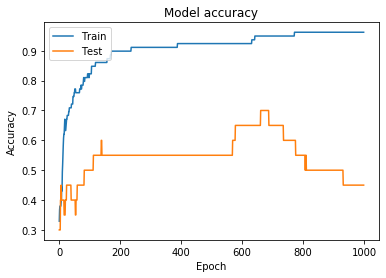

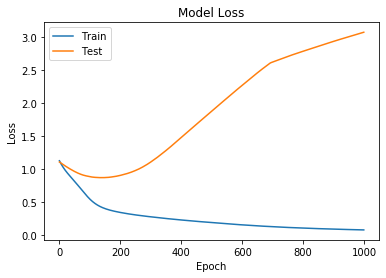

In [8]:
#Accurracy
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#Loss
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### 建立呈現變項間相關的圖

檢測X中所有的變項間的相關

In [9]:
X_df = pd.DataFrame(X_data)
cor = X_df.corr()

In [10]:
#不要顯示上方三角形區域
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [11]:
#設定顏色
cmap = sns.diverging_palette(220, 10, as_cmap=True)

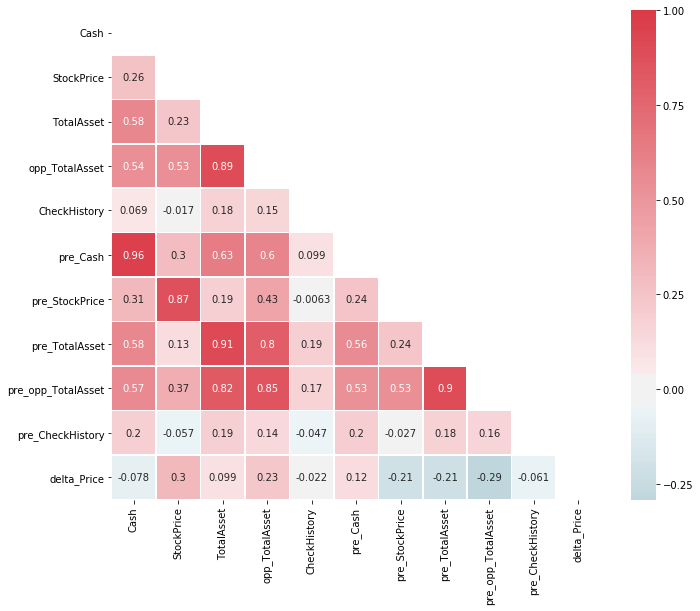

In [12]:
#設定呈現圖片大小
f, ax = plt.subplots(figsize=(11, 9))
#以heatmap呈現相關
sns.heatmap(
    cor,           # The data to plot
    mask=mask,     # Mask some cells
    cmap=cmap,     # What colors to plot the heatmap as
    annot=True,    # Should the values be plotted in the cells?
    center=0,      # The center value of the legend. With divergent cmap, where white is
    square=True,   # Force cells to be square
    linewidths=.5, # Width of lines that divide cells
)

### 將X中的變項依據p1的Decision做ANOVA分析

分別將X中的變項做ANOVA分析
<br/>
將pvalue值<0.05的變項列出作為接下來分析的變項

In [13]:
Y_df = pd.DataFrame(Y_data)
X_names = X_data.columns
X_list = []
for i in range(11):
    f = stats.f_oneway(X_data[X_names[i]][Y_df['Decision']=='buy'],
                       X_data[X_names[i]][Y_df['Decision']=='no trade'],
                       X_data[X_names[i]][Y_df['Decision']=='sell']
                      )
    if f.pvalue < 0.05:
        print(i)
        print(X_names[i])
        X_list.append(X_names[i])
    else:
        None

0
Cash
2
TotalAsset
3
opp_TotalAsset
5
pre_Cash
10
delta_Price


### 再建立一次model
將X中顯著的變項提出，並標準化作為input

In [14]:
X_sig = X_df.loc[:,X_list]
X_sig = preprocessing.scale(X_sig)

In [15]:
#固定每次跑出的結果以利解釋
np.random.seed(408)
#建構 model
model = Sequential()
model.add(Dense(80, input_dim = 5, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()
# compile the keras model
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
# fit the keras model, epochs = 500, batch_size = 80
#資料分配:79個training data, 20個testing data
test = model.fit(X_sig,Y, epochs = 500, batch_size = 80, validation_split = 0.2, shuffle = True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 80)                480       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 243       
Total params: 723
Trainable params: 723
Non-trainable params: 0
_________________________________________________________________
Train on 79 samples, validate on 20 samples
Epoch 1/500
79/79 [==============================] - 0s 2ms/step - loss: 1.1415 - accuracy: 0.1646 - val_loss: 1.1172 - val_accuracy: 0.3000
Epoch 2/500
79/79 [==============================] - 0s 39us/step - loss: 1.1369 - accuracy: 0.1646 - val_loss: 1.1148 - val_accuracy: 0.3000
Epoch 3/500
79/79 [==============================] - 0s 40us/step - loss: 1.1316 - accuracy: 0.1772 - val_loss: 1.1122 - val_accuracy: 0.3000
Epoch 4/500
79/79 [==============================

Epoch 54/500
79/79 [==============================] - 0s 38us/step - loss: 0.8740 - accuracy: 0.6203 - val_loss: 0.9692 - val_accuracy: 0.5000
Epoch 55/500
79/79 [==============================] - 0s 32us/step - loss: 0.8695 - accuracy: 0.6203 - val_loss: 0.9665 - val_accuracy: 0.5000
Epoch 56/500
79/79 [==============================] - 0s 50us/step - loss: 0.8649 - accuracy: 0.6203 - val_loss: 0.9639 - val_accuracy: 0.5000
Epoch 57/500
79/79 [==============================] - 0s 36us/step - loss: 0.8604 - accuracy: 0.6329 - val_loss: 0.9612 - val_accuracy: 0.5000
Epoch 58/500
79/79 [==============================] - 0s 31us/step - loss: 0.8559 - accuracy: 0.6329 - val_loss: 0.9586 - val_accuracy: 0.5000
Epoch 59/500
79/79 [==============================] - 0s 39us/step - loss: 0.8515 - accuracy: 0.6329 - val_loss: 0.9560 - val_accuracy: 0.5000
Epoch 60/500
79/79 [==============================] - 0s 38us/step - loss: 0.8470 - accuracy: 0.6329 - val_loss: 0.9535 - val_accuracy: 0.5000

Epoch 112/500
79/79 [==============================] - 0s 75us/step - loss: 0.6486 - accuracy: 0.7595 - val_loss: 0.8746 - val_accuracy: 0.5500
Epoch 113/500
79/79 [==============================] - 0s 62us/step - loss: 0.6456 - accuracy: 0.7595 - val_loss: 0.8742 - val_accuracy: 0.5500
Epoch 114/500
79/79 [==============================] - 0s 76us/step - loss: 0.6426 - accuracy: 0.7595 - val_loss: 0.8738 - val_accuracy: 0.5500
Epoch 115/500
79/79 [==============================] - 0s 64us/step - loss: 0.6396 - accuracy: 0.7595 - val_loss: 0.8735 - val_accuracy: 0.5500
Epoch 116/500
79/79 [==============================] - 0s 67us/step - loss: 0.6366 - accuracy: 0.7595 - val_loss: 0.8732 - val_accuracy: 0.5000
Epoch 117/500
79/79 [==============================] - 0s 68us/step - loss: 0.6337 - accuracy: 0.7595 - val_loss: 0.8729 - val_accuracy: 0.5000
Epoch 118/500
79/79 [==============================] - 0s 63us/step - loss: 0.6308 - accuracy: 0.7848 - val_loss: 0.8726 - val_accuracy:

Epoch 169/500
79/79 [==============================] - 0s 39us/step - loss: 0.5286 - accuracy: 0.8228 - val_loss: 0.8608 - val_accuracy: 0.5000
Epoch 170/500
79/79 [==============================] - 0s 50us/step - loss: 0.5273 - accuracy: 0.8228 - val_loss: 0.8604 - val_accuracy: 0.5000
Epoch 171/500
79/79 [==============================] - 0s 38us/step - loss: 0.5259 - accuracy: 0.8228 - val_loss: 0.8600 - val_accuracy: 0.5000
Epoch 172/500
79/79 [==============================] - 0s 38us/step - loss: 0.5246 - accuracy: 0.8228 - val_loss: 0.8595 - val_accuracy: 0.5000
Epoch 173/500
79/79 [==============================] - 0s 50us/step - loss: 0.5233 - accuracy: 0.8228 - val_loss: 0.8591 - val_accuracy: 0.5000
Epoch 174/500
79/79 [==============================] - 0s 40us/step - loss: 0.5220 - accuracy: 0.8228 - val_loss: 0.8586 - val_accuracy: 0.5000
Epoch 175/500
79/79 [==============================] - 0s 45us/step - loss: 0.5207 - accuracy: 0.8228 - val_loss: 0.8581 - val_accuracy:

Epoch 226/500
79/79 [==============================] - 0s 51us/step - loss: 0.4714 - accuracy: 0.8228 - val_loss: 0.8328 - val_accuracy: 0.5000
Epoch 227/500
79/79 [==============================] - 0s 25us/step - loss: 0.4706 - accuracy: 0.8228 - val_loss: 0.8323 - val_accuracy: 0.5000
Epoch 228/500
79/79 [==============================] - 0s 38us/step - loss: 0.4699 - accuracy: 0.8228 - val_loss: 0.8317 - val_accuracy: 0.5000
Epoch 229/500
79/79 [==============================] - 0s 63us/step - loss: 0.4692 - accuracy: 0.8228 - val_loss: 0.8312 - val_accuracy: 0.5000
Epoch 230/500
79/79 [==============================] - 0s 38us/step - loss: 0.4684 - accuracy: 0.8228 - val_loss: 0.8307 - val_accuracy: 0.5000
Epoch 231/500
79/79 [==============================] - 0s 26us/step - loss: 0.4677 - accuracy: 0.8228 - val_loss: 0.8302 - val_accuracy: 0.5000
Epoch 232/500
79/79 [==============================] - 0s 35us/step - loss: 0.4670 - accuracy: 0.8228 - val_loss: 0.8297 - val_accuracy:

Epoch 283/500
79/79 [==============================] - 0s 45us/step - loss: 0.4318 - accuracy: 0.8228 - val_loss: 0.8019 - val_accuracy: 0.5000
Epoch 284/500
79/79 [==============================] - 0s 50us/step - loss: 0.4311 - accuracy: 0.8228 - val_loss: 0.8012 - val_accuracy: 0.5000
Epoch 285/500
79/79 [==============================] - 0s 42us/step - loss: 0.4305 - accuracy: 0.8228 - val_loss: 0.8005 - val_accuracy: 0.5000
Epoch 286/500
79/79 [==============================] - 0s 42us/step - loss: 0.4298 - accuracy: 0.8228 - val_loss: 0.7998 - val_accuracy: 0.5000
Epoch 287/500
79/79 [==============================] - 0s 44us/step - loss: 0.4291 - accuracy: 0.8228 - val_loss: 0.7992 - val_accuracy: 0.5000
Epoch 288/500
79/79 [==============================] - 0s 40us/step - loss: 0.4284 - accuracy: 0.8228 - val_loss: 0.7984 - val_accuracy: 0.5000
Epoch 289/500
79/79 [==============================] - 0s 44us/step - loss: 0.4278 - accuracy: 0.8228 - val_loss: 0.7977 - val_accuracy:

Epoch 340/500
79/79 [==============================] - 0s 50us/step - loss: 0.3953 - accuracy: 0.8354 - val_loss: 0.7680 - val_accuracy: 0.5500
Epoch 341/500
79/79 [==============================] - 0s 38us/step - loss: 0.3947 - accuracy: 0.8354 - val_loss: 0.7675 - val_accuracy: 0.5500
Epoch 342/500
79/79 [==============================] - 0s 38us/step - loss: 0.3941 - accuracy: 0.8354 - val_loss: 0.7671 - val_accuracy: 0.5500
Epoch 343/500
79/79 [==============================] - 0s 51us/step - loss: 0.3935 - accuracy: 0.8354 - val_loss: 0.7666 - val_accuracy: 0.5500
Epoch 344/500
79/79 [==============================] - 0s 42us/step - loss: 0.3929 - accuracy: 0.8354 - val_loss: 0.7662 - val_accuracy: 0.5500
Epoch 345/500
79/79 [==============================] - 0s 50us/step - loss: 0.3923 - accuracy: 0.8354 - val_loss: 0.7657 - val_accuracy: 0.5500
Epoch 346/500
79/79 [==============================] - 0s 46us/step - loss: 0.3917 - accuracy: 0.8354 - val_loss: 0.7653 - val_accuracy:

Epoch 397/500
79/79 [==============================] - 0s 26us/step - loss: 0.3622 - accuracy: 0.8481 - val_loss: 0.7520 - val_accuracy: 0.5000
Epoch 398/500
79/79 [==============================] - 0s 26us/step - loss: 0.3616 - accuracy: 0.8481 - val_loss: 0.7519 - val_accuracy: 0.5000
Epoch 399/500
79/79 [==============================] - 0s 21us/step - loss: 0.3611 - accuracy: 0.8481 - val_loss: 0.7517 - val_accuracy: 0.5000
Epoch 400/500
79/79 [==============================] - 0s 38us/step - loss: 0.3605 - accuracy: 0.8481 - val_loss: 0.7516 - val_accuracy: 0.5000
Epoch 401/500
79/79 [==============================] - 0s 37us/step - loss: 0.3599 - accuracy: 0.8481 - val_loss: 0.7514 - val_accuracy: 0.5000
Epoch 402/500
79/79 [==============================] - 0s 40us/step - loss: 0.3593 - accuracy: 0.8481 - val_loss: 0.7513 - val_accuracy: 0.5000
Epoch 403/500
79/79 [==============================] - 0s 49us/step - loss: 0.3588 - accuracy: 0.8481 - val_loss: 0.7511 - val_accuracy:

Epoch 454/500
79/79 [==============================] - 0s 50us/step - loss: 0.3304 - accuracy: 0.8608 - val_loss: 0.7472 - val_accuracy: 0.5000
Epoch 455/500
79/79 [==============================] - 0s 25us/step - loss: 0.3298 - accuracy: 0.8608 - val_loss: 0.7472 - val_accuracy: 0.5000
Epoch 456/500
79/79 [==============================] - 0s 25us/step - loss: 0.3293 - accuracy: 0.8734 - val_loss: 0.7473 - val_accuracy: 0.5000
Epoch 457/500
79/79 [==============================] - 0s 24us/step - loss: 0.3288 - accuracy: 0.8734 - val_loss: 0.7474 - val_accuracy: 0.5000
Epoch 458/500
79/79 [==============================] - 0s 49us/step - loss: 0.3282 - accuracy: 0.8734 - val_loss: 0.7475 - val_accuracy: 0.5000
Epoch 459/500
79/79 [==============================] - 0s 38us/step - loss: 0.3277 - accuracy: 0.8734 - val_loss: 0.7475 - val_accuracy: 0.5000
Epoch 460/500
79/79 [==============================] - 0s 40us/step - loss: 0.3272 - accuracy: 0.8861 - val_loss: 0.7476 - val_accuracy:

做圖呈現accuracy跟loss的變化

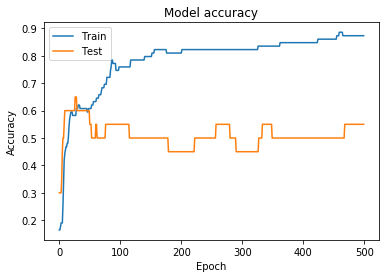

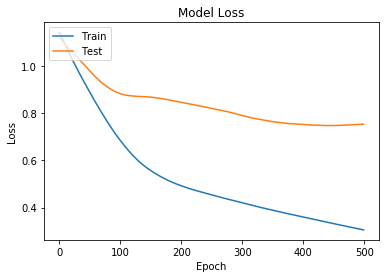

In [16]:
#Accuracy
plt.plot(test.history['accuracy'])
plt.plot(test.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
#Loss
plt.plot(test.history['loss'])
plt.plot(test.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## 最後結果
最後呈現的結果是model的accuracy約為0.6左右後，即沒辦法再往上提升，也嘗試過輸入不同的input或修正model中不同的參數，結果並沒有比較好，因此判斷可能是input的樣本數不夠去訓練成有效的模型。<br/>
因此應於將受試者分組之後，以同種類的人的資料彙整後，一同輸入進model中，再看能否建立出有效的模型。